# Contravariant & Covariant indices in Tensors (Symbolic)

In [1]:
from einsteinpy.symbolic import ChristoffelSymbols, RiemannCurvatureTensor
from einsteinpy.symbolic.predefined import Schwarzschild
import sympy
sympy.init_printing()

### Analysing the schwarzschild metric along with performing various operations

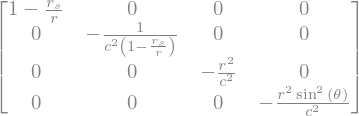

In [2]:
sch = Schwarzschild()
sch.tensor()

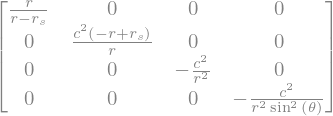

In [3]:
sch_inv = sch.inv()
sch_inv.tensor()

In [4]:
sch.order

In [5]:
sch.config

'll'

### Obtaining Christoffel Symbols from Metric Tensor

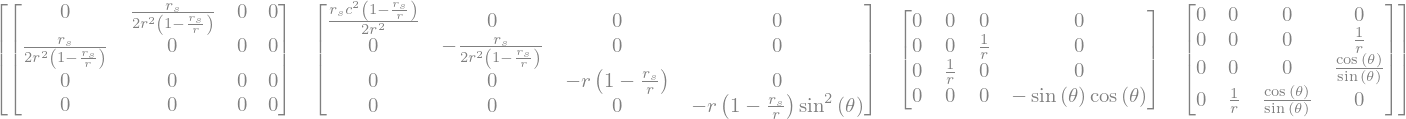

In [6]:
chr = ChristoffelSymbols.from_metric(sch_inv) # can be initialized from sch also
chr.tensor()

In [7]:
chr.config

'ull'

### Changing the first index to covariant

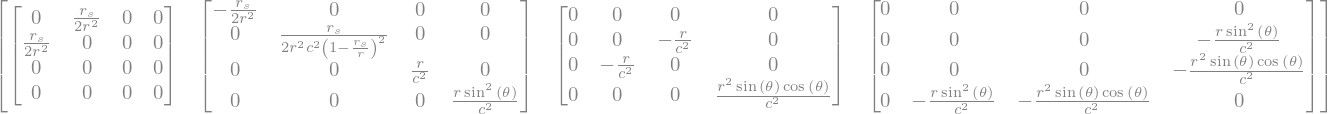

In [8]:
new_chr = chr.change_config('lll') # changing the configuration to (covariant, covariant, covariant)
new_chr.tensor()

In [9]:
new_chr.config

'lll'

### Any arbitary index configuration would also work!

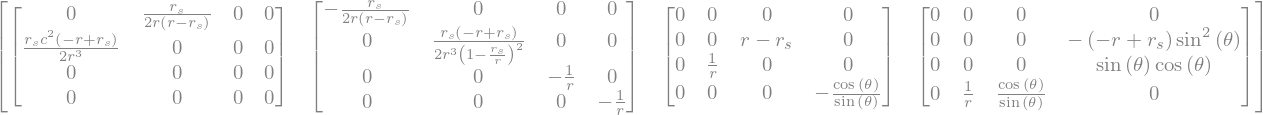

In [10]:
new_chr2 = new_chr.change_config('lul')
new_chr2.tensor()

### Obtaining Riemann Tensor from Christoffel Symbols and manipulating it's indices

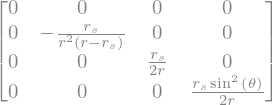

In [11]:
rm = RiemannCurvatureTensor.from_christoffels(new_chr2)
rm[0,0,:,:]

In [12]:
rm.config

'ulll'

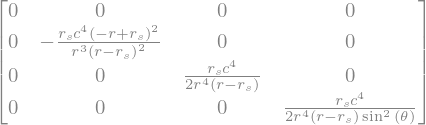

In [13]:
rm2 = rm.change_config("uuuu")
rm2[0,0,:,:]

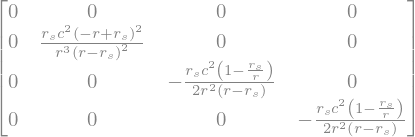

In [14]:
rm3 = rm2.change_config("lulu")
rm3[0,0,:,:]

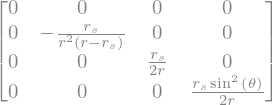

In [15]:
rm4 = rm3.change_config("ulll")
rm4.simplify()
rm4[0,0,:,:]

#### It is seen that `rm` and `rm4` are same as they have the same configuration